In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from ipywidgets import interact
import ipywidgets as widgets
import scipy.cluster.hierarchy as shc
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### PART 1

In [2]:
df = pd.read_csv('music.csv')
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [3]:
df.rename(columns = {'Top Genre':'Genre'}, inplace = True)

In [4]:
df.shape

(1994, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Genre                   1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   int64 
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [6]:
df.isnull().sum()

Index                     0
Title                     0
Artist                    0
Genre                     0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

<AxesSubplot:>

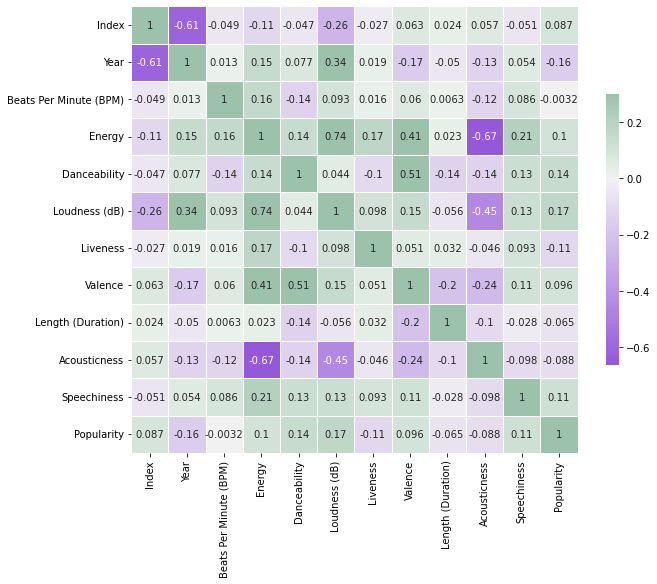

In [7]:
# Compute the correlation matrix
corr = df.select_dtypes('number').corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(1000, 500, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

In [8]:
# selecting out only numeric data type
df_numeric = df.select_dtypes('number')

# standard scaler
std_scaler = StandardScaler()

music_std_scale = std_scaler.fit_transform(df_numeric)
music_std_scale

array([[-1.73118239,  0.68315646,  1.31273922, ...,  2.24590849,
        -0.45335805,  0.79965286],
       [-1.72944513,  0.43489439,  0.52761564, ..., -0.4088327 ,
         0.45563738, -1.43062294],
       [-1.72770787,  0.49695991,  1.705301  , ..., -0.92599008,
         2.72812596,  0.66026062],
       ...,
       [ 1.72770787, -2.10979183,  1.705301  , ...,  1.55636532,
         0.45563738,  1.00874122],
       [ 1.72944513, -2.10979183,  1.91942561, ...,  0.86682216,
        -0.2261092 ,  0.38147615],
       [ 1.73118239, -2.10979183,  0.45624077, ...,  1.55636532,
        -0.45335805, -0.24578892]])

In [9]:
# convert numpy array to dataframe
df_1 = pd.DataFrame(music_std_scale, columns = df_numeric.columns)
df_1.head()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,-1.731182,0.683156,1.312739,-1.340009,-0.015521,-1.368667,-0.479098,0.748080,-0.656580,2.245908,-0.453358,0.799653
1,-1.729445,0.434894,0.527616,0.872304,-0.210991,-0.546064,-0.120314,1.271177,-0.592464,-0.408833,0.455637,-1.430623
2,-1.727708,0.496960,1.705301,0.420812,0.831514,0.002338,-0.718286,0.104268,0.839452,-0.925990,2.728126,0.660261
3,-1.725971,0.869353,1.883738,1.639841,-0.667086,1.373342,-0.957475,-0.499305,0.070064,-0.994944,-0.226109,1.148133
4,-1.724233,0.559025,-0.507320,1.007752,0.310261,1.099141,-0.538895,1.512607,-0.068853,-0.960467,-0.453358,-0.036701


In [10]:
df_2 = df_1[['Beats Per Minute (BPM)', 'Speechiness']]
df_2.head()

,Beats Per Minute (BPM),Speechiness
0,1.312739,-0.453358
1,0.527616,0.455637
2,1.705301,2.728126
3,1.883738,-0.226109
4,-0.507320,-0.453358


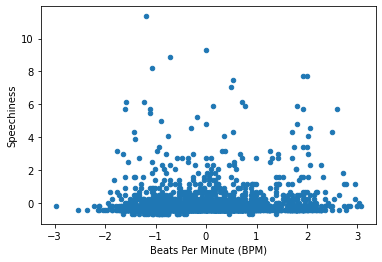

In [11]:
df_2.plot.scatter(x= 'Beats Per Minute (BPM)', y = 'Speechiness')
plt.show()

### PART 2

In [12]:
# Recommending similar songs

combined_features = df['Title']+'      '+df['Artist']+'     '+['Genre']         #concating Title, Artist and genre in to one 
combined_features

0                      Sunrise      Norah Jones     Genre
1                  Black Night      Deep Purple     Genre
2                  Clint Eastwood      Gorillaz     Genre
3               The Pretender      Foo Fighters     Genre
4       Waitin' On A Sunny Day      Bruce Springsteen ...
                              ...                        
1989        Heartbreak Hotel      Elvis Presley     Genre
1990               Hound Dog      Elvis Presley     Genre
1991           Johnny B. Goode      Chuck Berry     Genre
1992    Take Five      The Dave Brubeck Quartet     Genre
1993            Blueberry Hill      Fats Domino     Genre
Length: 1994, dtype: object

In [13]:
# vectorization is a step in feature extraction. The idea is to get some distinct features out of the text for the model to train on, by converting text to numerical vectors

#TF-IDF stands for Term Frequency Inverse Document Frequency of records means, the calculation of how relevant a word in a series is  relevant to a text.

# converting text data to feature value

#Convert a collection of raw documents to a matrix of TF-IDF features.

vectorizer=TfidfVectorizer()
feature_vectors=vectorizer.fit_transform(combined_features)
print(feature_vectors)

  (0, 1036)	0.0809981550988685
  (0, 1364)	0.551325271090189
  (0, 1900)	0.6074689139275269
  (0, 2618)	0.566092980825253
  (1, 2116)	0.5406778544941039
  (1, 660)	0.5298251548631183
  (1, 1878)	0.4787352887869771
  (1, 293)	0.43721818221315556
  (1, 1036)	0.0812745184310498
  (2, 1083)	0.5555659536282332
  (2, 792)	0.5856018210772626
  (2, 533)	0.5856018210772626
  (2, 1036)	0.07407756388502056
  (3, 921)	0.5160251998516706
  (3, 960)	0.5160251998516706
  (3, 2092)	0.6479399116327477
  (3, 2688)	0.20221742731876238
  (3, 1036)	0.0819632188119455
  (4, 2532)	0.3633937978554924
  (4, 404)	0.3606569871434162
  (4, 648)	0.3692272626681821
  (4, 2617)	0.4835179261955271
  (4, 1937)	0.2870032150683264
  (4, 2930)	0.5299882824604718
  (4, 1036)	0.06704255253177915
  :	:
  (1989, 2090)	0.4343646669533285
  (1989, 820)	0.422634238558245
  (1989, 1036)	0.07609715642012518
  (1990, 1246)	0.5962777959794416
  (1990, 727)	0.527163768014662
  (1990, 2090)	0.43054541912530886
  (1990, 820)	0.4189181

# recommandation engine : 1

In [14]:
# similar Songs

#created a variable and then converted all title values into list
title = df['Title'].tolist()

# user to input a song title
song_title = input('Enter a song title : ') 

# fetching similar or close values based on user input 
song_match = difflib.get_close_matches(song_title, title)     
print('Songs similar to input song : ',song_match)
#example: Love Is The Drug, Lavender, Sunrise

Enter a song title : Sunrise
Songs similar to input song :  ['Sunrise', 'Sunrise', 'No Surprises']


# recommandation engine : 2

In [15]:
# similar Artist

#created a variable and then converted all title values into list
artist = df['Artist'].tolist()

# user to input an artist's name
artist_name = input('Enter an Artist name : ') 

# fetching similar or close values based on user input
artist_match =difflib.get_close_matches(artist_name, artist)      
print('Songs similar to input song :', artist_match)
#example: Norah Jones, Deep Purple, John Miles

Enter an Artist name : John Miles
Songs similar to input song : ['John Miles', 'John Mayer', 'John Mayer']


For n_clusters = 2 The average silhouette_score is : 0.691440796264601
For n_clusters = 3 The average silhouette_score is : 0.4438031836855254
For n_clusters = 4 The average silhouette_score is : 0.4452499907929579
For n_clusters = 5 The average silhouette_score is : 0.46477422955693465
For n_clusters = 6 The average silhouette_score is : 0.3968740985432578
For n_clusters = 7 The average silhouette_score is : 0.40917340151947035
For n_clusters = 8 The average silhouette_score is : 0.4187253683756587
For n_clusters = 9 The average silhouette_score is : 0.42321454877196363
For n_clusters = 10 The average silhouette_score is : 0.38076294055342397


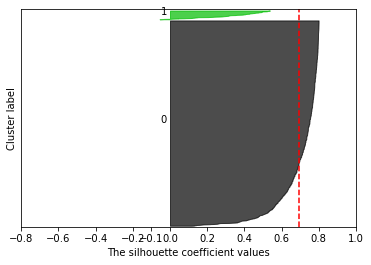

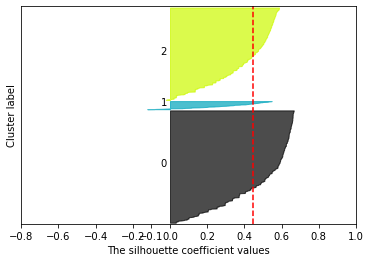

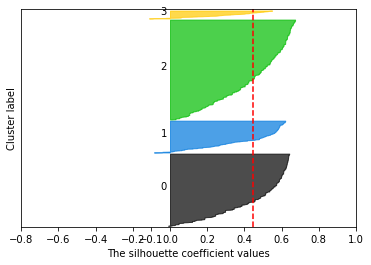

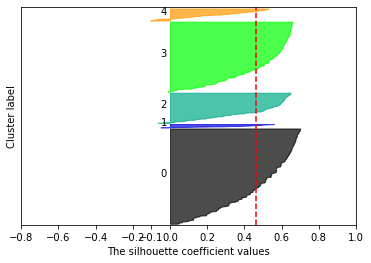

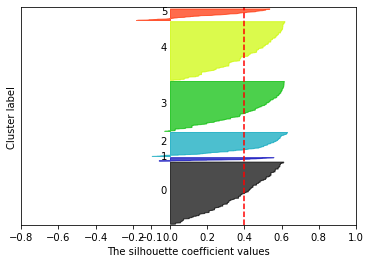

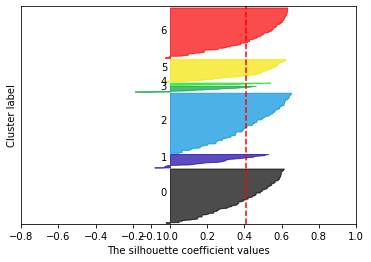

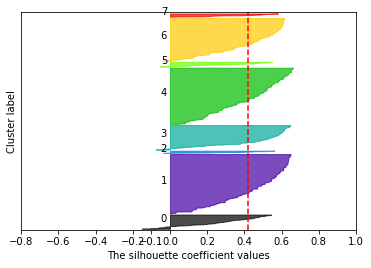

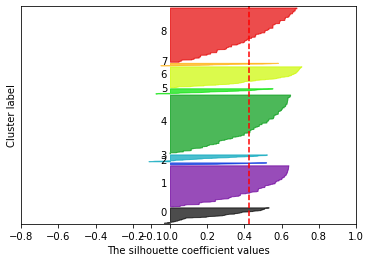

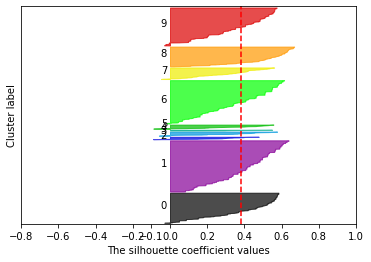

In [16]:
# Silhouette Value

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_2) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_2)

    silhouette_avg = silhouette_score(df_2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x = silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.8, -0.6, -0.4, -0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

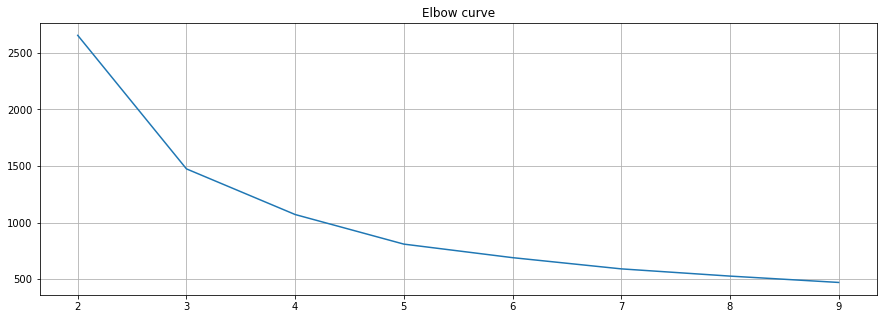

In [17]:
distorsions = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_2)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

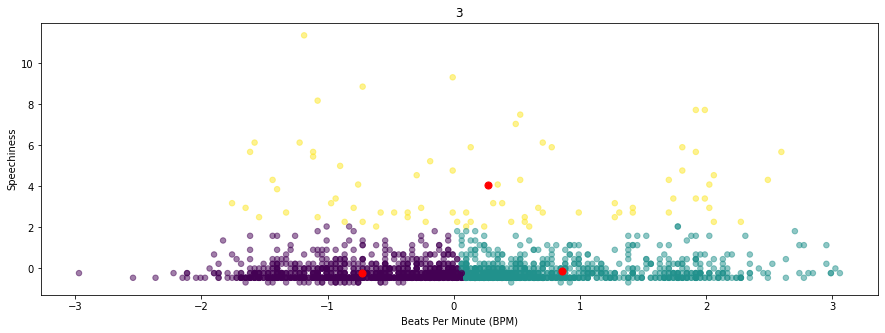

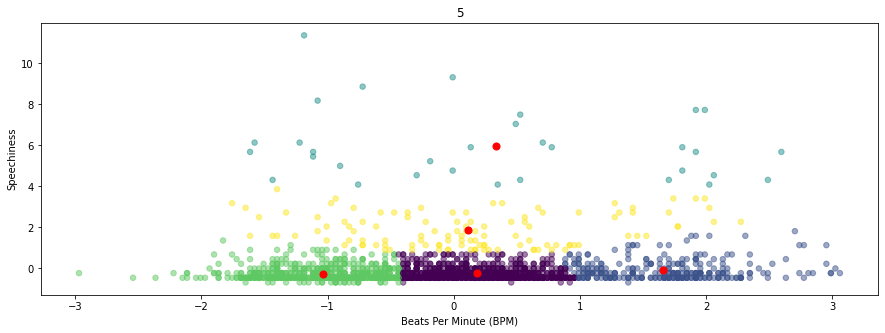

In [18]:
k = [3,5]

for k in k:
    kmeans = KMeans(n_clusters = k, n_init = 3).fit(df_2)
    centroids = kmeans.cluster_centers_
    f, ax = plt.subplots(figsize = (15,5))
    plt.scatter(df_2['Beats Per Minute (BPM)'], df_2['Speechiness'], c = kmeans.labels_.astype(float), s = 30, alpha = 0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c ='red', s = 50)
    plt.title(k)
    plt.xlabel('Beats Per Minute (BPM)')
    plt.ylabel('Speechiness')
    plt.show()

In [19]:
clusterer = KMeans(n_clusters = 2, random_state=10)
cluster_labels = clusterer.fit_predict(df_2)

df['cluster'] = cluster_labels
df['cluster'] 

0       0
1       0
2       1
3       0
4       0
       ..
1989    0
1990    0
1991    0
1992    0
1993    0
Name: cluster, Length: 1994, dtype: int32

In [20]:
for cluster in df.cluster.unique():
    print(cluster)
    print(df[df.cluster == cluster].Genre.value_counts())
    print('************************************************************************************************')
    print(df[df.cluster == cluster].Artist.value_counts())
    print('************************************************************************************************')
    print('************************************************************************************************')

0
album rock              401
adult standards         122
dutch pop                87
alternative rock         85
dutch indie              75
                       ... 
electro house             1
australian americana      1
chicago soul              1
trance                    1
bebop                     1
Name: Genre, Length: 147, dtype: int64
************************************************************************************************
The Beatles           35
Queen                 34
Coldplay              27
U2                    26
The Rolling Stones    23
                      ..
Peter Schilling        1
New Order              1
Limp Bizkit            1
Snowy White            1
Fats Domino            1
Name: Artist, Length: 706, dtype: int64
************************************************************************************************
************************************************************************************************
1
album rock              12
dance pop       

In [21]:
def fit_and_plot_clustering(df, clusterer,x,y, print_number=False):
    df = df.copy()
    df['clusterid'] = clusterer.fit_predict(df[[x, y]])
    n_clusters = df['clusterid'].max() + 1
    n_outliers = np.sum(df['clusterid'] == -1)
    if print_number:
        print(f'number of clusters: {n_clusters}\nnumber of outliers: {n_outliers}')
    cmap = plt.get_cmap('Set1', n_clusters+1)
    ax = df.plot(kind='scatter', x=x, y=y, c='clusterid', cmap=cmap, s=80, colorbar=False)
    ax.grid()
    
    return df
    
style = {'description_width': '150px'}
layout = widgets.Layout(width='400px')

In [22]:
def plot_dbscan(eps = 0.3, min_samples = 10):
    dbscan = DBSCAN(eps = eps, min_samples = min_samples)
    lable_df = fit_and_plot_clustering(df_2, dbscan, 'Beats Per Minute (BPM)', 'Speechiness', print_number = True)
    
i = interact(plot_dbscan
            , eps = widgets.SelectionSlider(options = np.arange(1.5, 2.0, 0.1), description='Epsilon', layout=layout, style=style, disabled=False,continuous_update=False,orientation='horizontal',readout=True)
            , min_samples=widgets.SelectionSlider(options=range(1, 11), description='Minimum of samples', layout=layout, style=style, disabled=False,continuous_update=False,orientation='horizontal',readout=True)
        );

interactive(children=(SelectionSlider(continuous_update=False, description='Epsilon', layout=Layout(width='400…